In [20]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit import Aer
import math
import matplotlib.pyplot as plt

In [2]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell + meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 528, '11': 472}


In [3]:
circ.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

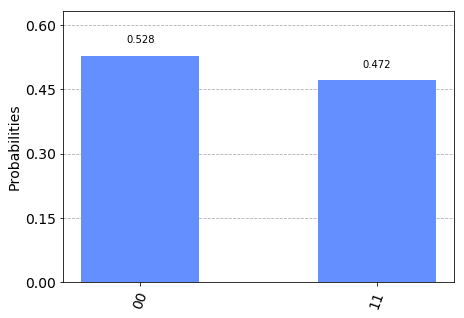

In [22]:
plot_histogram(counts)

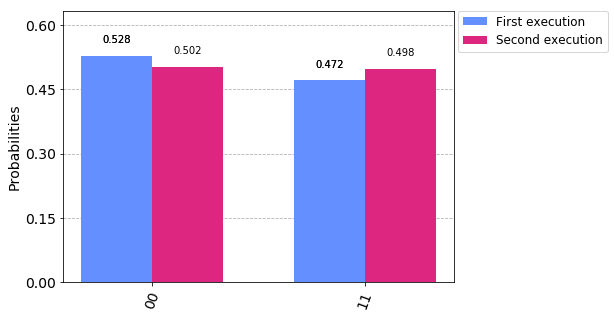

In [5]:
# Execute 2-qubit Bell state again
second_result = execute(circ, backend, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

In [6]:
# quantum circuit to make a Bell state
bell_1 = QuantumCircuit(3, 3)
bell_1.h(0)
bell_1.cx(0, 1)
bell_1.cx(0, 2)

meas_1 = QuantumCircuit(3, 3)
meas_1.measure(range(3), range(3))

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ_1 = bell_1 + meas_1
result_1 = execute(circ_1, backend, shots=1000).result()
counts_1  = result_1.get_counts(circ_1)
print(counts_1)

{'000': 512, '111': 488}


In [7]:
circ_1.draw()

┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2

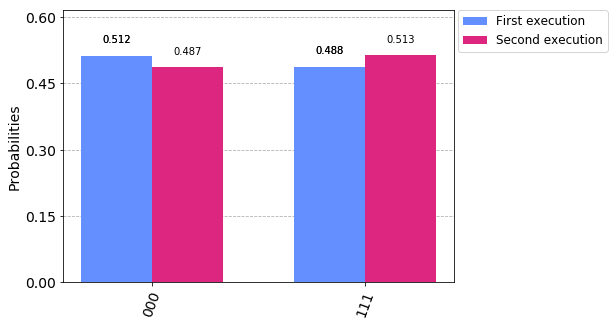

In [8]:
# Execute 3-qubit Bell state again
second_result_1 = execute(circ_1, backend, shots=1000).result()
second_counts_1 = second_result_1.get_counts(circ_1)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts_1, second_counts_1], legend=legend)

In [9]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_vector
%matplotlib inline


In [10]:
# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

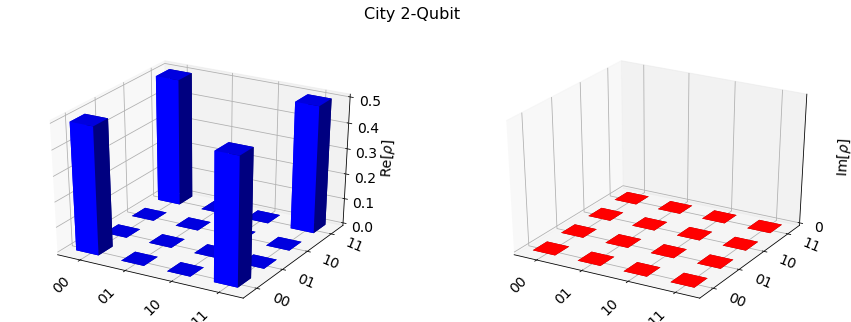

In [24]:
plot_state_city(psi, title="City 2-Qubit", color=['b','r'])

In [12]:
# execute the quantum circuit 2
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result_1 = execute(bell_1, backend).result()
psi_1  = result_1.get_statevector(bell_1)

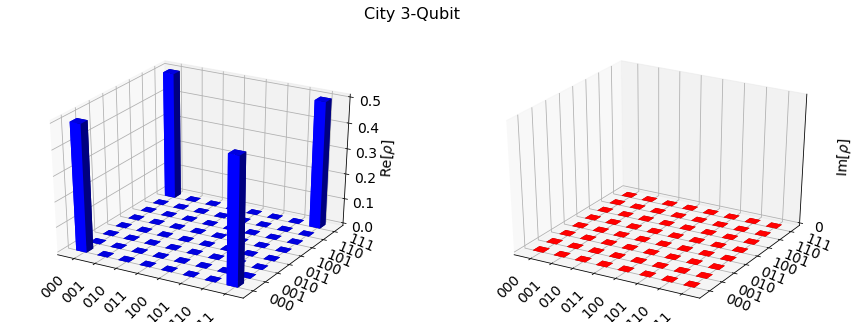

In [13]:
plot_state_city(psi_1, title="City 3-Qubit",color=['b','r'])

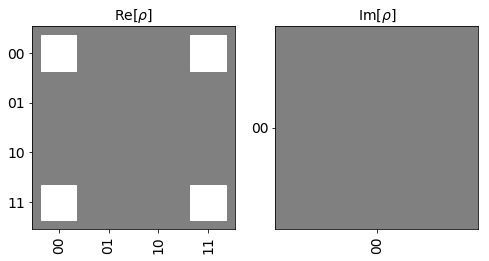

In [14]:
plot_state_hinton(psi)

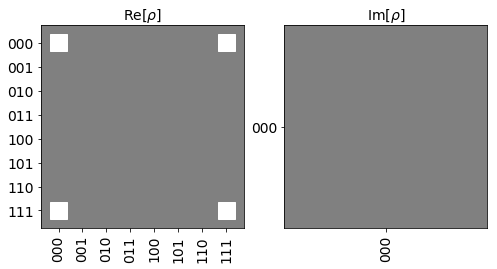

In [15]:
plot_state_hinton(psi_1)

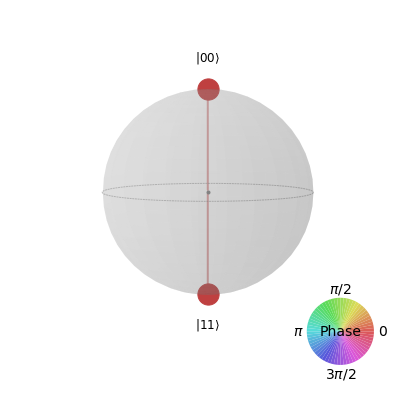

In [16]:
plot_state_qsphere(psi)

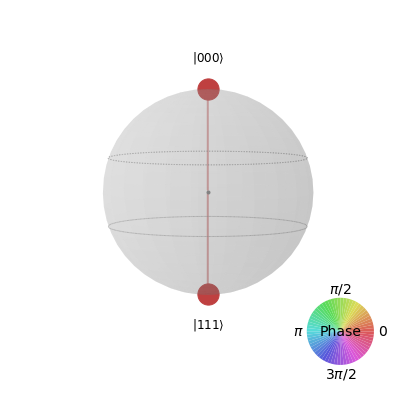

In [17]:
plot_state_qsphere(psi_1)

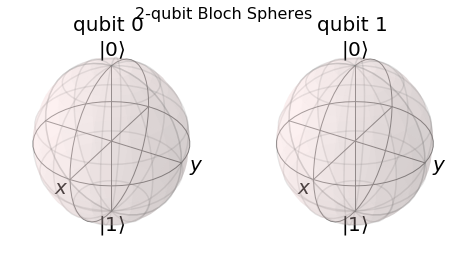

In [18]:
plot_bloch_multivector(psi, title="2-qubit Bloch Spheres")

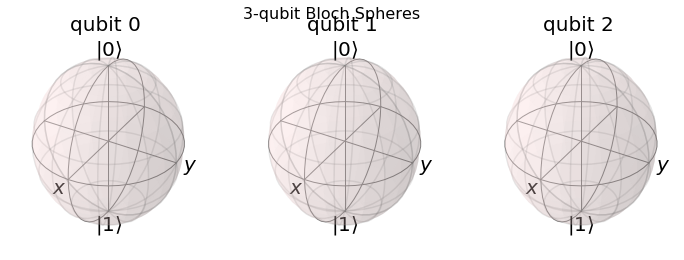

In [19]:
plot_bloch_multivector(psi_1, title="3-qubit Bloch Spheres")